In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals()) # define a helper function to specify environment variables

In [3]:
# Read in the IMDB reviews dataset and drop irrelevant columns
reviews_df = pd.read_json('IMDB_reviews.json', lines=True)
reviews_df = reviews_df.drop(['review_date','is_spoiler'],axis=1)
print(reviews_df.shape)

(573913, 5)


In [4]:
# Group number of ratings per user, sort in descending order and select the top 400 users
query = " SELECT user_id, COUNT(rating) AS count FROM reviews_df GROUP BY user_id ORDER BY count DESC LIMIT 400"
top_users = pysqldf(query)
print(top_users)

        user_id  count
0     ur2898520   1303
1     ur4248714   1021
2     ur0453068    806
3    ur60028700    770
4    ur20552756    755
..          ...    ...
395  ur12009777     94
396   ur0874373     94
397   ur0234740     94
398   ur7472847     93
399  ur37581915     93

[400 rows x 2 columns]


In [7]:
# Select rating records from one user
rank = 100
user1 = reviews_df[reviews_df['user_id']==top_users['user_id'][rank]]

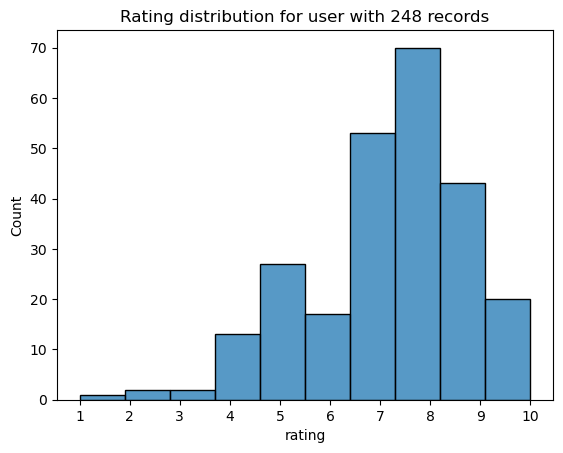

In [8]:
# Plot it
fig, ax1 = plt.subplots()
ax1 = sns.histplot(data=user1, x='rating', bins=10)
ax1.set_title(f"Rating distribution for user with {top_users['count'][rank]} records")
ax1.set_xticks(range(1,11))
plt.show()

In [25]:
# Read in the happiness score file and join the movie id information.
sc_df = pd.read_csv('happiness_score_list.txt', sep=',', header=None).T
sc_df.columns = ['score']
movie_df = pd.read_json('IMDB_movie_details.json', lines=True)

sc_df['movie_id'] = movie_df['movie_id']

In [92]:
# Join the score of each movie to reviewer rating dataframe
rating_df = reviews_df[['movie_id','user_id','rating']]
rating_sc_df = rating_df.join(sc_df.set_index('movie_id'),on='movie_id', validate='m:1')
user_rt_sc_df = rating_sc_df[rating_sc_df['user_id']==top_users['user_id'][0]]

In [93]:
# Plot rating against score
"""
fig2, ax2 = plt.subplots(figsize=[18,8])

ax2 = sns.scatterplot(data=user_rt_sc_df, x='score', y='rating')
ax2.set_title(f"Rating distribution against score")

plt.show()
"""

'\nfig2, ax2 = plt.subplots(figsize=[18,8])\n\nax2 = sns.scatterplot(data=user_rt_sc_df, x=\'score\', y=\'rating\')\nax2.set_title(f"Rating distribution against score")\n\nplt.show()\n'

D:\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
D:\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
D:\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
D:\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
D:\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applie

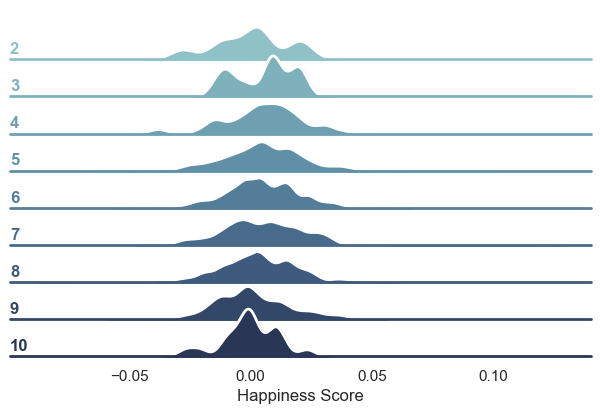

In [94]:
# ©seaborn 'ridge plot'
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
x = user_rt_sc_df['score']
g = user_rt_sc_df['rating']
df = pd.DataFrame(dict(x=x, g=g))

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="",xlabel="Happiness Score")
g.despine(bottom=True, left=True)